## Task 1


In [1]:
import numpy as np
import scipy.linalg as sl
import csv
import matplotlib.pyplot as plt

In [2]:
# import the text file and create two vectors v and t

import os

try:
	datfilestr = input('Which file name?\n---->  ')
	datfile=open(datfilestr,'r')
except FileNotFoundError:
	txt="""File {} not found in catalogue {}. 
	    Make sure you downloaded the file from the course homepage
	    and you run this script in its catalogue.
	    """
	print(txt.format(datfilestr,os.path.abspath(os.curdir)))
else:
	line = [ll.strip('\n').split(',') for ll in datfile.readlines()]
	t,v=list(zip(*[(float(l[0]),float(l[1])) for l in line]))
	t=np.array(t)
	v=np.array(v)
	print('You get now two shape {sh} arrays "t" and "v" with data.'.format(sh=t.shape))

Which file name?
---->  homework3.txt
You get now two shape (80,) arrays "t" and "v" with data.


In [3]:
# blue points are the given diskret values 
# implement a code which uses the least square problem with 3 different 
class Least_square_methode():
    def __init__(self, v, t):
        self.v = v
        self.t = t
        self.A = np.empty((0,5), int)
        for t_i in self.t: 
            self.A = np.vstack([self.A,[1, t_i, t_i**2, t_i**3, t_i**4]])
    
    def normal_eqaution(self): # red line
        AT = np.transpose(self.A)
        normal = sl.solve(np.dot(AT, self.A), np.dot(AT,v)) 
        return alpha
    def qr_factorisation(self):
        q,r = np.linalg.qr(self.A) # compute the reduced QR factorization
        qT = np.transpose(q) # build the transpose because q isn't square
        qv = np.dot(qT,v) 
        beta = sl.solve(r,qv) # solve the upper-triangular system R*x = QT*v  beta is the x vector we are searching for
        return beta
    def svd_decomposition(self):
        u,s,d = np.linalg.svd(self.A) # computes the svd
        u = np.linalg.inv(u)
        uv = np.dot(u,self.v)
        S = np.zeros((5, 80))
        for i in range(5):
            S[i,i] = 1/s[i]
        w = np.dot(S,uv)
        gamma = np.dot(np.linalg.inv(d),w)
        return gamma

In [4]:
A = Least_square_methode(v,t)
normal = A.normal_eqaution()

NameError: name 'alpha' is not defined

In [5]:
A = Least_square_methode(v,t)
qr = A.qr_factorisation()

In [5]:
A = Least_square_methode(v,t)
svd = A.svd_decomposition()

In [ ]:
def normal_eqaution(A): # red line
        AT = np.transpose(self.A)
        normal = sl.solve(np.dot(AT, self.A), np.dot(AT,v)) 
        return alpha

computing the A needs for all the same time

[  3.99977426e+00  -1.53545581e-03   3.00267362e+00   1.99819673e+00
   1.00040411e+00]
[  3.99977426e+00  -1.53545576e-03   3.00267362e+00   1.99819673e+00
   1.00040411e+00]
[  3.99977426e+00  -1.53545576e-03   3.00267362e+00   1.99819673e+00
   1.00040411e+00]


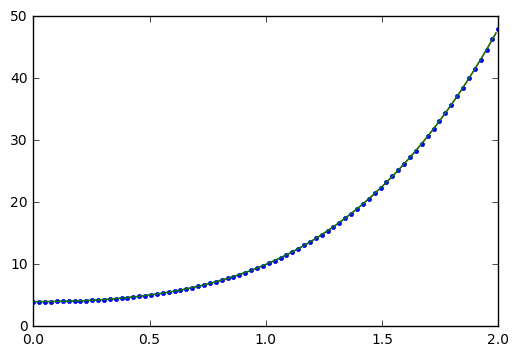

In [231]:
A = Least_square_methode(v,t)
normal = A.normal_eqaution()
print(normal)
qr = A.qr_factorisation()
print(qr)
svd = A.svd_decomposition()
print(svd)
g = np.arange(0,2,0.01)
plt.plot(g, ((svd[0]+svd[1]*g+svd[2]*g**2+svd[3]*g**3+svd[4]*g**4)),'r-', t,v,'.', g, ((qr[0]+qr[1]*g+qr[2]*g**2+qr[3]*g**3+qr[4]*g**4)),'g-')
plt.show()


## Task


I implemented the unknown a_i with help of the three different ways. The a looks with the normal equation, the qr factorization and with the svd decomposition exactly the same : a= [  3.99977426e+00,  -1.53545576e-03 ,  3.00267362e+00,   1.99819673e+00, 1.00040411e+00]. If I plot the discrete values and the function it fits really well. 


To compare the execution time we can firstly note that we have to build A (the matrix with the function in it) for all methods. So this time doesn't matter. 
For the normal equation solution we need to transpose A, built two products of two matrices and solve one linear equation system.  (if i restart the kernel, it takes about 378ms for the execution)
For the qr factorization we need the qr factorization command or compute it and we need also one transpose, one product and one solution of a linear equation system. (about 344ms)
For the last solution, the svd decomposition, we need the svd decomposition, two inverse, three products and build the diagonal matrix with the diagonal entries from the svd decomposition. (123ms)
It seems that the svd takes the most time because there are the most calculations. But even if i execute the program with the existing A and the stored solution the normal equation takes the most time (about 20ms). 
I think the execution time of the last method is so good, because we don't have to use the solve command. We can built the inverse of the diagonal matrix very easy so that we can use $x=A^{-1}*b$ to solve the linear equation. 

You can find the code in the attachment also with the plot.


